In [1]:
from gensim import models
import numpy as np
#from sklearn.decomposition import PCA

In [22]:
#****
def unit(vec):
    unit_vec=vec/np.linalg.norm(vec)
    return unit_vec
def proj_neural_on_subspace(unit_neural_vec,unit_subspace_vec):# before input vectors should be united
    u=unit_neural_vec
    v=np.reshape(unit_subspace_vec,(300,)) # change_point!!!
    v_norm=np.sqrt(sum(v**2))
    proj_u_on_v=(np.dot(u,v)/v_norm**2)*v
    return proj_u_on_v#  1-d array for 300 element
#****
def neural_re_embedding(neural_vec,subspace_vec):# before input all vectors should be united////neutralize
    n=neural_vec
    s=proj_neural_on_subspace(neural_vec,subspace_vec)
    re_embedding_vec=(n-s)/np.linalg.norm(n-s)
    return re_embedding_vec
#****
#np.isclose(0,q)
def equalize(e_vec1,e_vec2,subspace_vec):# all input vectors  should be united
    emean_vec=(e_vec1+e_vec2)/2
    emean_vec_subspace=proj_neural_on_subspace(emean_vec,subspace_vec)
    v=emean_vec-emean_vec_subspace
    
    common=1-(np.linalg.norm(v))**2
    ve1=(proj_neural_on_subspace(e_vec1,subspace_vec)-emean_vec_subspace)/np.linalg.norm(proj_neural_on_subspace(e_vec1,subspace_vec)-emean_vec_subspace)
    ve2=(proj_neural_on_subspace(e_vec2,subspace_vec)-emean_vec_subspace)/np.linalg.norm(proj_neural_on_subspace(e_vec2,subspace_vec)-emean_vec_subspace)
    
    re_e_vec1=v+np.sqrt(common)*ve1
    re_e_vec2=v+np.sqrt(common)*ve2
    
    return re_e_vec1,re_e_vec2
def self_pca(matrix):# time to discuss!!!!
    n_feature=matrix.shape[1]
    #n_feature
    mean=np.array([np.mean(matrix[:,i]) for i in range(n_feature)])
    #mean
    norm=matrix-mean
    scatter=np.dot(np.transpose(norm),norm)
    eig_val,eig_vec=np.linalg.eig(scatter)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_feature)]
    eig_pairs.sort(reverse=True)
    return eig_pairs
def direct_cos_bias(neural,subspace):# neutralize check
    bias=np.dot(neural,subspace)/(np.linalg.norm(neural)*np.linalg.norm(subspace))
    return bias
def distance(neural,e_vec1,e_vec2):
    dist1=np.linalg.norm(neural-e_vec1)
    dist2=np.linalg.norm(neural-e_vec2)
    return dist1,dist2
'''
pca=PCA(n_components=1,svd_solver='full')# k=1 for genderspace
model=pca.fit(genderspace)
g=model.components_
'''

"\npca=PCA(n_components=1,svd_solver='full')# k=1 for genderspace\nmodel=pca.fit(genderspace)\ng=model.components_\n"

In [653]:
w['he']

array([ 1.92382812e-01,  1.27929688e-01, -1.91650391e-02, -2.92968750e-02,
        3.10058594e-02, -8.44726562e-02, -9.96093750e-02, -5.34667969e-02,
        1.65039062e-01, -3.36914062e-02, -1.51977539e-02, -1.83593750e-01,
        6.05468750e-02, -4.46777344e-02, -2.85156250e-01,  4.34570312e-02,
       -3.10058594e-02,  7.22656250e-02,  1.04980469e-01, -2.08740234e-02,
       -7.20214844e-03,  1.24511719e-01,  1.66015625e-02, -5.49316406e-03,
       -6.44531250e-02, -1.66992188e-01, -1.16210938e-01, -2.62451172e-02,
        1.84570312e-01,  3.71093750e-02,  2.38037109e-02,  1.63085938e-01,
       -1.40380859e-02,  2.45361328e-02,  8.44726562e-02, -3.07617188e-02,
        1.48437500e-01, -8.91113281e-03,  3.73535156e-02,  2.06298828e-02,
        2.83203125e-01, -4.24804688e-02,  3.02734375e-01,  1.09863281e-02,
        4.80957031e-02,  1.26953125e-01, -1.24023438e-01,  2.90527344e-02,
        4.73632812e-02,  6.73828125e-02,  1.34765625e-01,  8.49609375e-02,
       -3.14941406e-02, -

In [3]:
w = models.KeyedVectors.load_word2vec_format(
    '/home/senhan/GoogleNews-vectors-negative300.bin', binary=True)
word=[['she','he'],['her','his'],['woman','man'],['Mary','John'],['herself','himself'],['daughter','son'],['mother','father'],['gal','guy'],['girl','boy'],['female','male']]

In [88]:
for i in range(color_num):

    j=2*i
    print(j)


0
2
4
6
8
10


[t-SNE] Computing 12 nearest neighbors...
[t-SNE] Indexed 13 samples in 0.000s...
[t-SNE] Computed neighbors for 13 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 13 / 13
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.501129
[t-SNE] KL divergence after 300 iterations: 0.365738


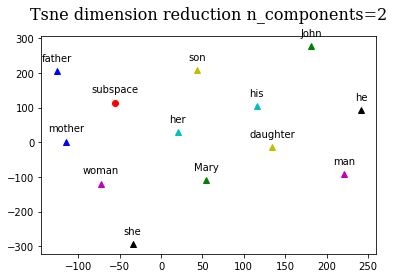

In [94]:
from sklearn.manifold import TSNE#atplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matrix=[]
for i in range(6):
    matrix.append(unit(w[word[i][0]]))
    matrix.append(unit(w[word[i][1]]))
    
matrix.append(subspace)
matrix=np.asarray(matrix)
#matrix=np.asarray([rembed_word,neural_word,subspace])
#matrix=np.asarray([rembed_word,subspace])
#matrix=np.asarray([neural_word,subspace])

tsne=TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_r=tsne.fit_transform(matrix)
#tsne_r=tsne_results

tsne_results=tsne_r[0:12]
xs=tsne_results[:,0]
ys=tsne_results[:,1]

color_num=int(len(tsne_results)/2)
color=['k','c','m','g','y','b']

#for i in range(color_num):
 #   string='^'+color[i]
  #  j=2*i

for i in range(6):
    string='^'+color[i]
    j=2*i
    plt.plot(xs[j],ys[j],string)
    plt.plot(xs[j+1],ys[j+1],string)

plt.gca().title.set_position([.5,1.05])
plt.title('Tsne dimension reduction n_components=2',font)
labels=['she','he','her','his','woman','man','Mary','John','daughter','son','mother','father']
i=0
for x,y in zip(xs,ys):
    label=labels[i]
    i=i+1
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,10),ha='center')

plt.plot(tsne_r[12][0],tsne_r[12][1],'or')
plt.annotate('subspace',(tsne_r[12][0],tsne_r[12][1]),textcoords='offset points',xytext=(0,10),ha='center')

#plt.plot(tsne_results[1][0],tsne_results[1][1],'ok')
#plt.annotate('re_football',(tsne_results[1][0],tsne_results[1][1]),textcoords='offset points',xytext=(0,10),ha='center')





#labels=['she','he','her','his','woman','man','Mary','John','daughter','son','mother','father','subspace']



plt.show()

In [93]:
sample=tsne_results[2:]
xs=sample[:,0]
ys=sample[:,1]
plt.plot(xs,ys,'ob')
plt.gca().title.set_position([.5,1.05])
plt.title('Tsne dimension reduction n_components=2',font=)
labels=['subspace','he','she']
i=0
for x,y in zip(xs,ys):
    label=labels[i]
    i=i+1
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,10),ha='center')

plt.plot(tsne_results[0][0],tsne_results[0][1],'or')
plt.annotate('football',(tsne_results[0][0],tsne_results[0][1]),textcoords='offset points',xytext=(0,10),ha='center')

plt.plot(tsne_results[1][0],tsne_results[1][1],'ok')
plt.annotate('re_football',(tsne_results[1][0],tsne_results[1][1]),textcoords='offset points',xytext=(0,10),ha='center')

plt.show()

SyntaxError: invalid syntax (<ipython-input-93-8ca878e2d258>, line 6)

In [4]:
genderspace=[]
for i in range(len(word)):
    difference=unit(w[word[i][0]])-unit(w[word[i][1]])
    genderspace.append(difference)
genderspace # not unit vector

eig_word_pair=self_pca(np.array(genderspace)) # k=1 pick first row as genderspace
eig_val=eig_word_pair[0][0]
eig_vector=eig_word_pair[0][1]
eig_word_pair

subspace=unit(eig_vector)# unit vector


e1=unit(w['he'])
e2=unit(w['she'])
neural_word=unit(w['homemaker'])

rembed_word=neural_re_embedding(neural_word,subspace)
d0=direct_cos_bias(neural_word,subspace)
dr=direct_cos_bias(rembed_word,subspace)

rembed_e1,rembed_e2=equalize(e1,e2,subspace)
e1_n=direct_cos_bias(e1,neural_word)
e2_n=direct_cos_bias(e2,neural_word)

e1_rn=direct_cos_bias(rembed_e1,rembed_word)
e2_rn=direct_cos_bias(rembed_e2,rembed_word)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)
gapminder.head(n=3)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


In [6]:
from sklearn.manifold import TSNE#atplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [7]:
word=[['she','he'],['her','his'],['woman','man'],['Mary','John'],['herself','himself'],['daughter','son'],['mother','father'],['gal','guy'],['girl','boy'],['female','male']]
# codes...
print('shape of genderspace: {}'.format(np.shape(genderspace)))
print('shape of subspacespace: {}'.format(np.shape(subspace)))

shape of genderspace: (10, 300)
shape of subspacespace: (300,)


In [655]:
neutral_word=['sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']
bias_neu_sub=[]
hdebias_neu_sub=[]
for item in neutral_word:
    u_item=unit(w[item])
    reembed=unit(neural_re_embedding(u_item,subspace))
    bias_neu_sub.append(np.abs(direct_cos_bias(u_item,subspace)))#absolut values 
    hdebias_neu_sub.append(np.abs(direct_cos_bias(reembed,subspace)))# absolut value for plotiing
bias_neu_sub=np.asarray(bias_neu_sub)
hdebias_neu_sub=np.asarray(hdebias_neu_sub)

In [677]:

np.linalg.norm(subspace)

1.0

In [ ]:
neutral_word=['sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
bias_neu_sub #men_means = [20, 34, 30, 35, 27]
hdebias_neu_sub #women_means = [25, 32, 34, 20, 25]

x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, bias_neu_sub, width, label='neutral')
rects2 = ax.bar(x + width/2, hdebias_neu_sub, width, label='re_neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Direct bias cos similarity')
ax.set_title('Hard debias: projecion of sampled neutral word on gender subspace')
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(neutral_word)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()


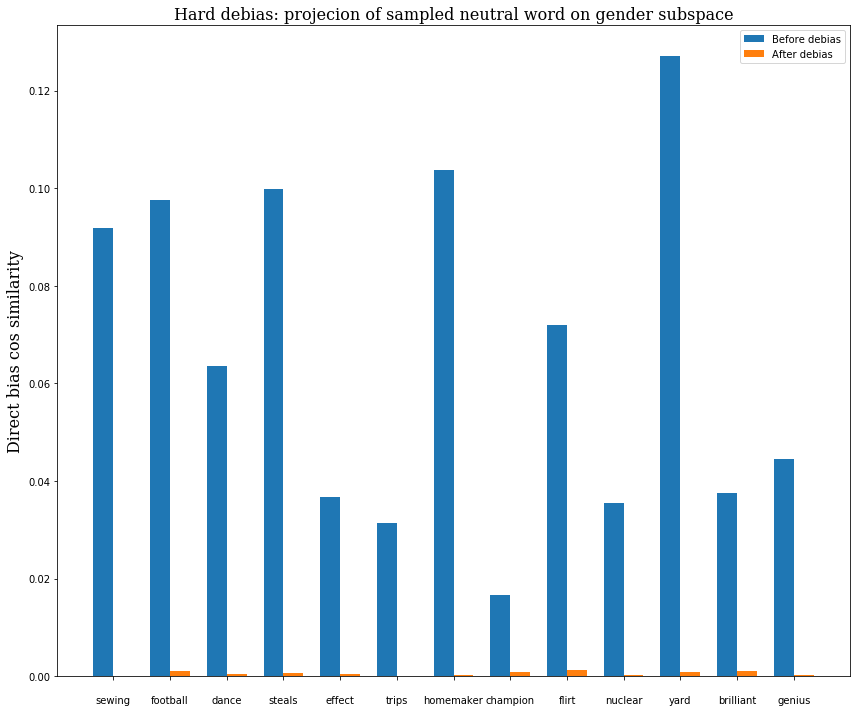

In [660]:
neutral_word=['sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
bias_neu_sub #men_means = [20, 34, 30, 35, 27]
hdebias_neu_sub #women_means = [25, 32, 34, 20, 25]

x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,10))
rects1 = ax.bar(x - width/2, bias_neu_sub, width, label='Before debias')
rects2 = ax.bar(x + width/2, 100000*hdebias_neu_sub, width, label='After debias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Direct bias cos similarity',font)
ax.set_title('Hard debias: projecion of sampled neutral word on gender subspace',font)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(neutral_word)
ax.legend()

fig.tight_layout()

plt.show()


In [376]:
neutral_word0=['tote','reading','records','clip','commit','game','browsing','sites','seconds','slow','arrival','tactical']
neutral_word1=['crafts','credits','trimester','tanning','user','parts','drop','reel','firepower','ultrasound','busy','hoped','command']
neutral_word2=['housing','caused','ill','scrimmage','modeling','beautiful','oils','self','gel','looks','zeal','builder','drafted']
neutral_word3=['sewing','dress','dance','steals','effect','trips','pageant','earrings','flirt','nuclear','yard','brilliant','genius']
neutral_word4=['divorce','nurses','firms','cocky','journeyman','gay','sexuality','salon','tearful','cold','hot','warm','cow']
neutral_word5=['voters','seeking','poem','poet','warriors','youth','ties','guru','buddy','angle','sassy','breasts','pearls']
neutral_word6=['jewelry','iv','vases','regional','firmly','rule','doctor','phd','buddies','burly','beard','necklace',]
neutral_word7=['homemaker','model','training','fitness','babe','dancer','singer','lamb','folks','friend','teacher','priest','mate','sexy']
neutral_word8=['physic','chemistry','sports','baseball','idol','assistant','servant','slave','sweety','astronomy','artist']



True!


In [670]:
neutral_word0=['tote','reading','records','clip','commit','game','browsing','sites','seconds','slow','arrival','tactical']
neutral_word1=['crafts','credits','trimester','tanning','user','parts','drop','reel','firepower','ultrasound','busy','hoped','command']
neutral_word2=['housing','caused','ill','scrimmage','modeling','beautiful','oils','self','gel','looks','zeal','builder','drafted']
neutral_word3=['sewing','dress','dance','steals','effect','trips','pageant','earrings','flirt','nuclear','yard','brilliant','genius']
neutral_word4=['divorce','nurses','firms','cocky','journeyman','gay','sexuality','salon','tearful','cold','hot','warm','cow']
neutral_word5=['voters','seeking','poem','poet','warriors','youth','ties','guru','buddy','angle','sassy','breasts','pearls']
neutral_word6=['jewelry','iv','vases','regional','firmly','rule','doctor','phd','buddies','burly','beard','necklace',]
neutral_word7=['homemaker','model','training','fitness','babe','dancer','singer','lamb','folks','friend','teacher','priest','mate','sexy']
neutral_word8=['physic','chemistry','sports','baseball','idol','assistant','servant','slave','sweety','astronomy','artist']

name='neutral_word'
neutral_wordset=[]
neutral_vectors=[]
arr=[neutral_word0,neutral_word1,neutral_word2,neutral_word3,neutral_word4,neutral_word5,neutral_word6,neutral_word8]
for i in range(len(arr)):
    for j in range(len(arr[i])):
        neutral_wordset.append(arr[i][j])
len(neutral_wordset)
for item in neutral_wordset:
    neutral_vectors.append(w[item])

neutral_vectors=np.asarray(neutral_vectors)
neutral_vectors.shape

(100, 300)

In [270]:
# softdebias
num=np.random.randint(0,10000,size=(100,))
n_100_vec=[]
#for item in num:
#    n_100_vec.append(unit(w.vectors[item]))
#n_100_vec=np.asarray(n_100_vec)
#np.linalg.norm(n_100_vec[0])# inputn..

for item in neutral_vectors:
    n_100_vec.append(unit(item))
n_100_vec=np.asarray(n_100_vec)#inputn

k_100=w.vectors[11:(len(num)+11)]
for i in range(len(k_100)):
    k_100[i]=unit(k_100[i])
k_100=np.asarray(k_100)
np.linalg.norm(k_100[0])#inputa..



label=[]
for i in range(len(k_100)):
    label.append(np.dot(k_100[i],k_100[i]))
label
label=np.reshape(label,(len(num),1))
label.shape


#k_10=w.vectors[:10]

b_10_vectors=[]
for i in range(len(num)):
    b_10_vectors.append(unit(subspace))
b_10_vectors
b_100_vec=np.asarray(b_10_vectors)
np.linalg.norm(b_100_vec[0])# inputb..

1.0

Model: "model_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_115 (InputLayer)          (None, 300)          0                                            
__________________________________________________________________________________________________
dense_39 (Dense)                (None, 300)          90300       input_115[0][0]                  
__________________________________________________________________________________________________
dot_77 (Dot)                    (None, 1)            0           dense_39[0][0]                   
                                                                 dense_39[0][0]                   
Total params: 90,300
Trainable params: 90,300
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/80
100/100 [=

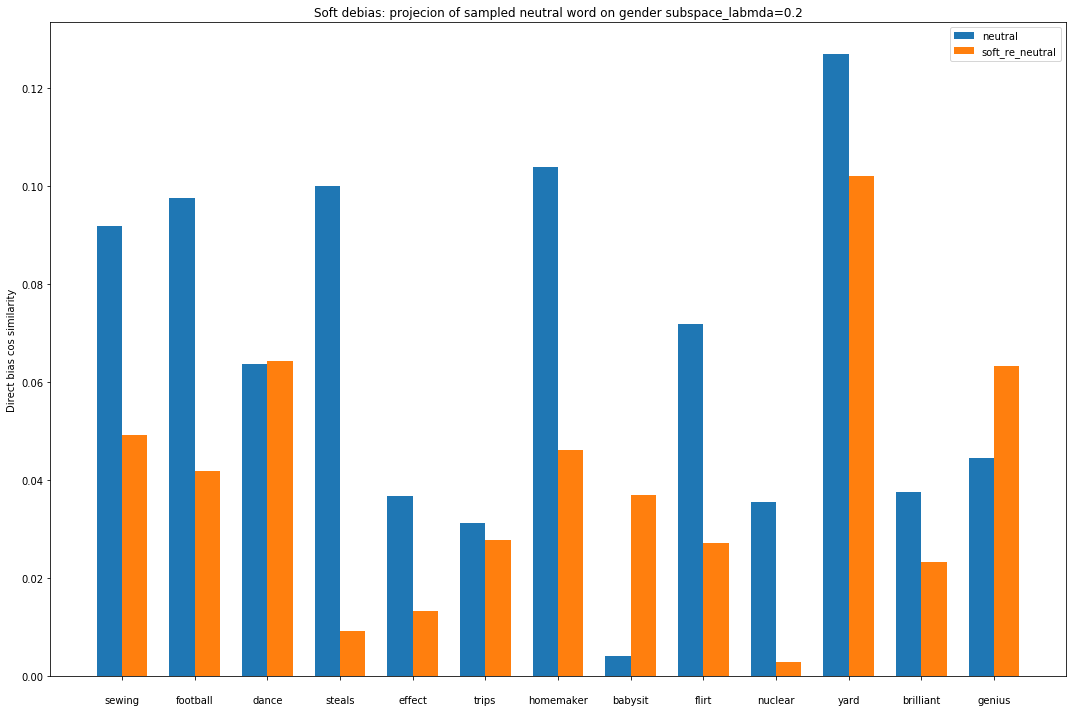

In [271]:
import keras
import tensorflow as tf
inputa=keras.layers.Input((300,))
inputn=keras.layers.Input((300,))
inputb=keras.layers.Input((300,))
unit_num=300

T=keras.layers.Dense(unit_num,activation='relu')
weix=T(inputa)
x=keras.layers.dot([weix,weix],axes=1)
n=T(inputn)
b=T(inputb)
lamb=keras.layers.dot([n,b],axes=1)
lamb_result=keras.layers.Lambda(lambda x: x*0.6)(lamb)
model=keras.Model([inputa,inputn,inputb],x)
def custom_loss(layer):
    def loss(y_true,y_pred):
        return keras.backend.mean(keras.backend.square(y_pred-y_true)+keras.backend.square(layer),axis=-1)
    return loss
optimizer=tf.keras.optimizers.RMSprop(0.0001)
model.compile(optimizer=optimizer,loss=custom_loss(lamb_result),metrics=['accuracy'])
model.summary()
model.fit([w_100,n_100_vec,b_100_vec],label,epochs=80,batch_size=20)
loss,accuracy=model.evaluate([w_100,n_100_vec,b_100_vec],label)
print('Accuracy: %f'%(accuracy*100))
weight=model.get_weights()[0]

In [ ]:
weight=np.load('/home/')

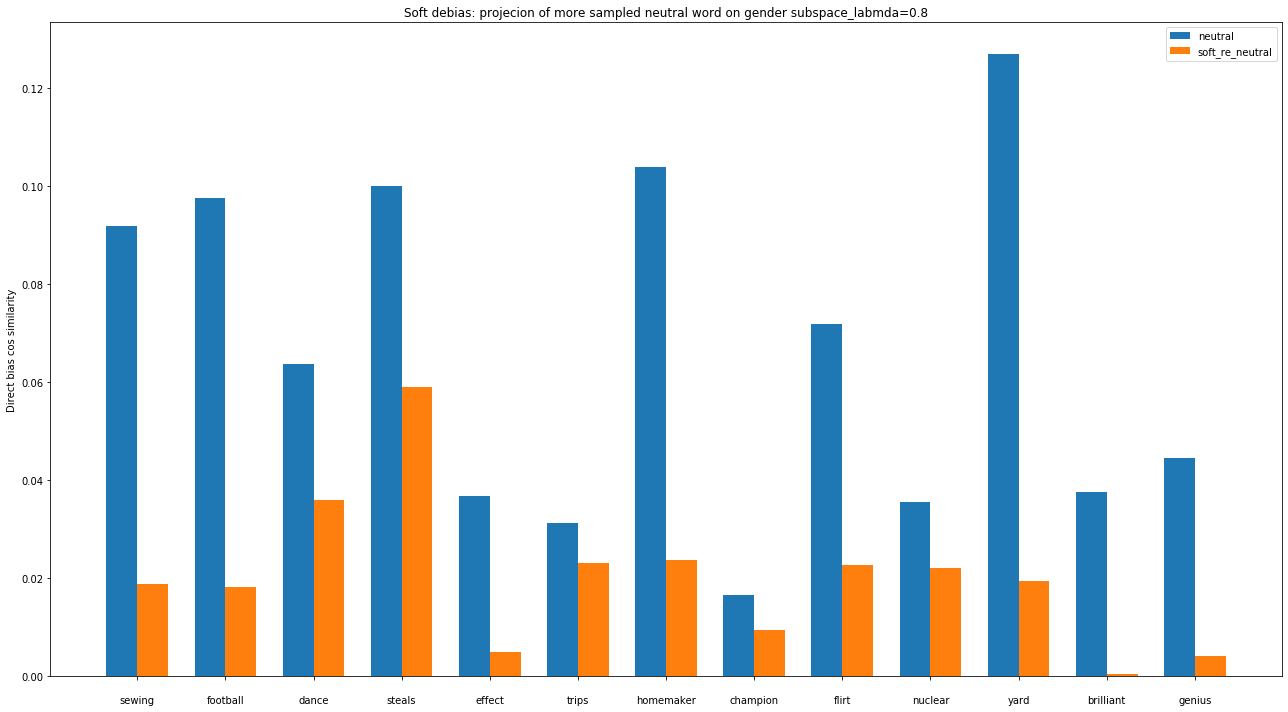

In [388]:
#neutral_word=['powerful','programmer','angel','physic','babysitter','sing','leader','taller','sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']
neutral_word=['sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']
bias_neu_sub=[]
sdebias_neu_sub=[]
for item in neutral_word:
    u_item=unit(w[item])
    sreembed=unit(np.dot(u_item,weight))
    bias_neu_sub.append(np.abs(direct_cos_bias(u_item,subspace)))#absolut values 
    sdebias_neu_sub.append(np.abs(direct_cos_bias(sreembed,subspace)))# absolut value for plotiing
bias_neu_sub=np.asarray(bias_neu_sub)
sdebias_neu_sub=np.asarray(sdebias_neu_sub)

x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x - width/2, bias_neu_sub, width, label='neutral')
rects2 = ax.bar(x + width/2, sdebias_neu_sub, width, label='soft_re_neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Direct bias cos similarity')
ax.set_title('Soft debias: projecion of more sampled neutral word on gender subspace_labmda=0.8')
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(neutral_word)
ax.legend()

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
for item in neutral_word:
    u_item=unit(w[item])
    sreembed=unit(np.dot(u_item,weight))
    bias_neu_sub.append(np.abs(direct_cos_bias(u_item,subspace)))#absolut values 
    sdebias_neu_sub.append(np.abs(direct_cos_bias(sreembed,subspace)))# absolut value for plotiing

In [ ]:
neutral_word=['sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']
bias_neu_sub=[]
sdebias_neu_sub=[]
for item in neutral_word:
    u_item=unit(w[item])
    sreembed=unit(np.dot(u_item,weight))
    bias_neu_sub.append(np.abs(direct_cos_bias(u_item,subspace)))#absolut values 
    sdebias_neu_sub.append(np.abs(direct_cos_bias(sreembed,subspace)))# absolut value for plotiing
bias_neu_sub=np.asarray(bias_neu_sub)
sdebias_neu_sub=np.asarray(sdebias_neu_sub)

x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x - width/2, bias_neu_sub, width, label='neutral')
rects2 = ax.bar(x + width/2, sdebias_neu_sub, width, label='soft_re_neutral')
rects3 = ax.bar()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Direct bias cos similarity')
ax.set_title('Soft debias: projecion of more sampled neutral word on gender subspace_labmda=0.8')
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(neutral_word)
ax.legend()

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

In [431]:
testword=unit(w['taller'])
e1=unit(w['he'])
e2=unit(w['she'])
r1_T=unit(np.dot(e1,weight))
r2_T=unit(np.dot(e2,weight))
retestword=unit(np.dot(testword,weight))


In [345]:
origi=direct_cos_bias(testword,subspace)# bias on subspace
reorigi=direct_cos_bias(retestword,subspace)

In [346]:
origi

0.102323994

In [347]:
reorigi

0.024770053

In [91]:
#weight_2_breast=weight

In [99]:
#weight_8_breast=weight

In [275]:
weight_6_good_perform=weight

In [276]:
np.save('/home/senhan/Documents/condapython/weight_6_goof_perform.npy',weight)

In [283]:
data=np.load('/home/senhan/Documents/condapython/weight_8_goof_perform.npy')
data

array([[-0.01048656, -0.08455277,  0.0859512 , ..., -0.00822108,
        -0.02325639, -0.09722653],
       [-0.02531283,  0.0125734 , -0.07865039, ...,  0.07328708,
         0.05232848,  0.02113007],
       [-0.03551973,  0.06548864, -0.0007488 , ...,  0.08263781,
         0.03393481, -0.09226647],
       ...,
       [-0.01005869, -0.02479704,  0.03851292, ..., -0.05345914,
         0.00227987,  0.02846359],
       [-0.05630827, -0.0194666 , -0.06528523, ...,  0.05774571,
        -0.03807454,  0.09476996],
       [ 0.07084772,  0.05161479,  0.06479114, ..., -0.0654707 ,
         0.04555807,  0.06877405]], dtype=float32)

In [39]:
data=np.load('/home/senhan/Documents/condapython/weight_8_goof_perform.npy')
weight=data

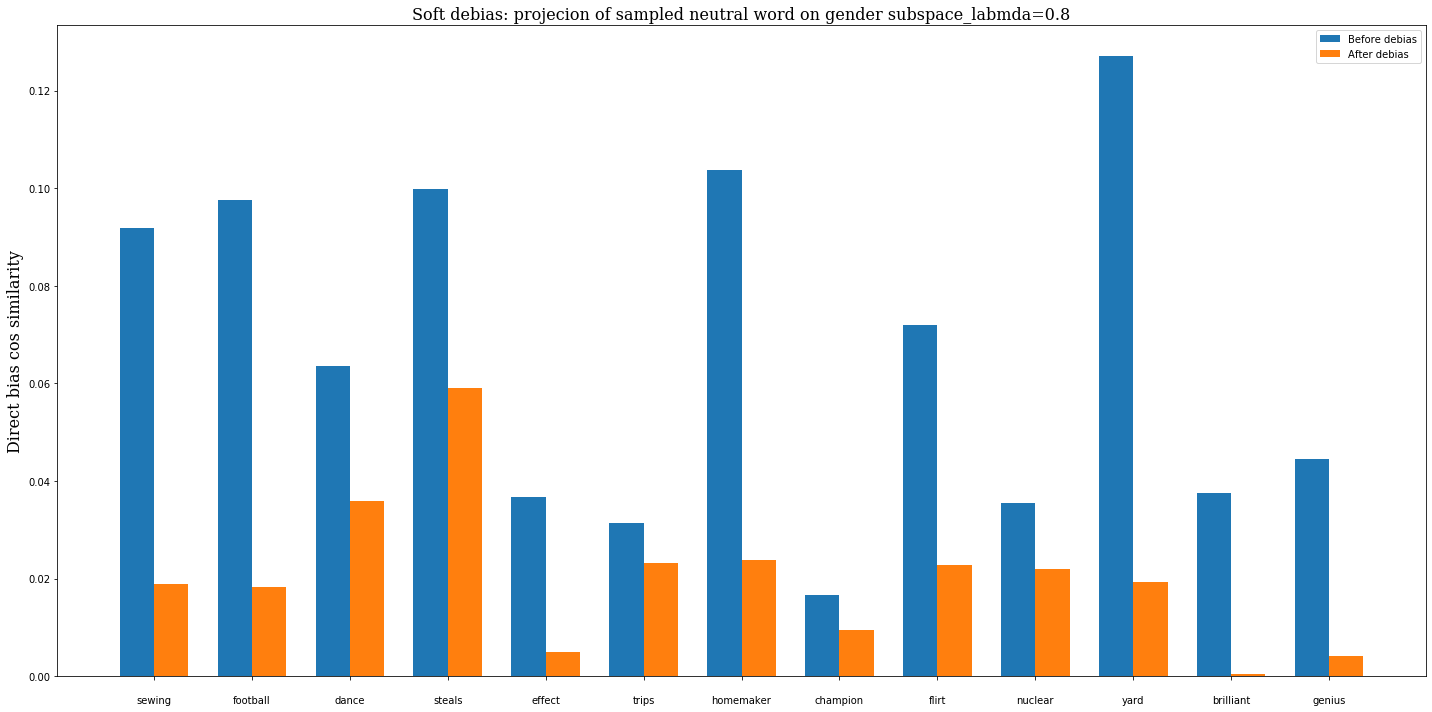

In [40]:
#neutral_word=['powerful','programmer','angel','physic','babysitter','sing','leader','taller','sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']
neutral_word=['sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']
bias_neu_sub=[]
sdebias_neu_sub=[]
for item in neutral_word:
    u_item=unit(w[item])
    sreembed=unit(np.dot(u_item,weight))
    bias_neu_sub.append(np.abs(direct_cos_bias(u_item,subspace)))#absolut values 
    sdebias_neu_sub.append(np.abs(direct_cos_bias(sreembed,subspace)))# absolut value for plotiing
bias_neu_sub=np.asarray(bias_neu_sub)
sdebias_neu_sub=np.asarray(sdebias_neu_sub)

x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, bias_neu_sub, width, label='Before debias')
rects2 = ax.bar(x + width/2, sdebias_neu_sub, width, label='After debias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Direct bias cos similarity',font)
ax.set_title('Soft debias: projecion of sampled neutral word on gender subspace_labmda=0.8',font)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(neutral_word)
ax.legend()

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()


1.0

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.798969
[t-SNE] KL divergence after 300 iterations: 0.116492


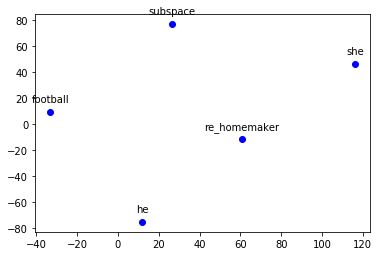

In [611]:
from sklearn.manifold import TSNE#atplotlib inline
import matplotlib.pyplot as plt
import matplotlib

e1=unit(w['he'])
e2=unit(w['she'])
neural_word=unit(w['football'])
rembed_word=neural_re_embedding(neural_word,subspace)
matrix=np.asarray([neural_word,rembed_word,subspace,e1,e2])
#matrix=np.asarray([rembed_word,neural_word,subspace])
#matrix=np.asarray([rembed_word,subspace])
#matrix=np.asarray([neural_word,subspace])

tsne=TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_results=tsne.fit_transform(matrix)
xs=tsne_results[:,0]
ys=tsne_results[:,1]
plt.plot(xs,ys,'ob')
labels=['football','re_homemaker','subspace','he','she']
i=0
for x,y in zip(xs,ys):
    label=labels[i]
    i=i+1
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,10),ha='center')


plt.show()

In [610]:
tsne_results[2:]

array([[ 127.58522 , -148.51982 ],
       [ 182.12758 ,  -31.743443],
       [  21.346842,  -77.38952 ]], dtype=float32)

In [587]:
tsne_results

array([[ 83.51257  , 216.59436  ],
       [ 97.37293  , 277.59604  ],
       [ 54.347183 , 320.08487  ],
       [ -2.4269118, 293.91302  ],
       [ 27.28979  , 241.2509   ]], dtype=float32)

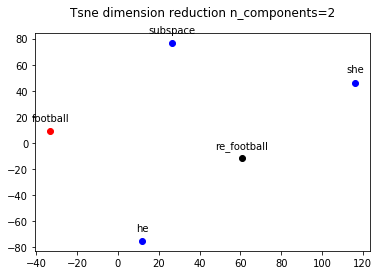

In [612]:
sample=tsne_results[2:]
xs=sample[:,0]
ys=sample[:,1]
plt.plot(xs,ys,'ob')
plt.gca().title.set_position([.5,1.05])
plt.title('Tsne dimension reduction n_components=2',font=)
labels=['subspace','he','she']
i=0
for x,y in zip(xs,ys):
    label=labels[i]
    i=i+1
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,10),ha='center')

plt.plot(tsne_results[0][0],tsne_results[0][1],'or')
plt.annotate('football',(tsne_results[0][0],tsne_results[0][1]),textcoords='offset points',xytext=(0,10),ha='center')

plt.plot(tsne_results[1][0],tsne_results[1][1],'ok')
plt.annotate('re_football',(tsne_results[1][0],tsne_results[1][1]),textcoords='offset points',xytext=(0,10),ha='center')

plt.show()

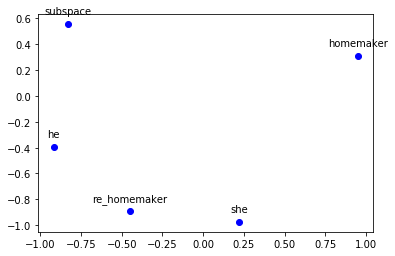

0.99999994

In [573]:
u_tsne_re=tsne_results
for i in range(len(u_tsne_re)):
    u_tsne_re[i]=unit(u_tsne_re[i])
xs=u_tsne_re[:,0]
ys=u_tsne_re[:,1]
plt.plot(xs,ys,'ob')
labels=['homemaker','re_homemaker','subspace','he','she']
i=0
for x,y in zip(xs,ys):
    label=labels[i]
    i=i+1
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,10),ha='center')


plt.show()



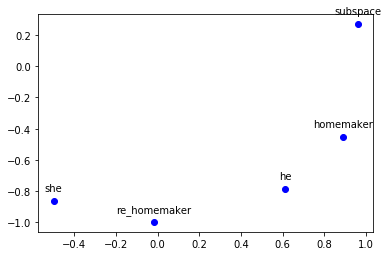

In [544]:
#plt.plot(tsne_results[0],'o',tsne_results[1],'o',tsne_results[2],'o',tsne_results[3],'o',tsne_results[4],'o')
n=tsne_results[0]
rn=tsne_results[1]
sb=tsne_results[2]
e_1=tsne_results[3]
e_2=tsne_results[4]

xs=tsne_results[:,0]
ys=tsne_results[:,1]
plt.plot(xs,ys,'ob')
labels=['homemaker','re_homemaker','subspace','he','she']
i=0
for x,y in zip(xs,ys):
    label=labels[i]
    i=i+1
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,10),ha='center')


plt.show()



In [450]:
testword=unit(w['breast'])
e1=unit(w['he'])
e2=unit(w['she'])

#harddebias
hretestword=neural_re_embedding(testword,subspace)#neutralize
hr1,hr2=equalize(e1,e2,subspace)

hdist=distance(testword,e1,e2)
hrdist=distance(hretestword,hr1,hr2)

# softdebias
sretestword=unit(np.dot(testword,weight))
sr1=unit(np.dot(e1,weight))
sr2=unit(np.dot(e2,weight))

sdist=distance(testword,e1,e2)
srdist=distance(sretestword,sr1,sr2)

In [475]:
np.shape(subspace)

(300,)

In [29]:
# four bars
def fourbars_hard_debias_eval(neutralwords,eword1,eword2,subspace):
    #beforedist=[]
    #afterdist=[]
    dist_he=[]
    dist_she=[]
    hdist_he=[]
    hdist_she=[]
    for testword in neutralwords:
        testword=unit(w[testword])#homemaker
        e1=unit(eword1)#he
        e2=unit(eword2)#she
#harddebias
        hretestword=neural_re_embedding(testword,subspace)#neutralize
        hr1,hr2=equalize(e1,e2,subspace)
        
        dist_he.append(direct_cos_bias(testword,e1))
        dist_she.append(direct_cos_bias(testword,e2))
        hdist_he.append(direct_cos_bias(hretestword,hr1))
        hdist_she.append(direct_cos_bias(hretestword,hr2))
        #hdist=distance(testword,e1,e2)
        #hrdist=distance(hretestword,hr1,hr2)
        #beforedist.append(np.abs(hdist[0]-hdist[1]))
        #afterdist.append(np.abs(hrdist[0]-hrdist[1]))
    return dist_he,dist_she,hdist_he,hdist_she


def fourbars_soft_debias_eval(neutralwords,eword1,eword2,weight):
    dist_he=[]
    dist_she=[]
    sdist_he=[]
    sdist_she=[]
    for testword in neutralwords:
        testword=unit(w[testword])
        e1=unit(eword1)
        e2=unit(eword2)
#harddebias
        sretestword=unit(np.dot(testword,weight))
        sr1=unit(np.dot(e1,weight))
        sr2=unit(np.dot(e2,weight))

        dist_he.append(direct_cos_bias(testword,e1))
        dist_she.append(direct_cos_bias(testword,e2))
        sdist_he.append(direct_cos_bias(sretestword,sr1))
        sdist_she.append(direct_cos_bias(sretestword,sr2))
    return dist_he,dist_she,sdist_he,sdist_she


In [30]:
he=direct_cos_bias(unit(w['football']),unit(w['he']))
she=direct_cos_bias(unit(w['football']),unit(w['she']))
ninety=direct_cos_bias([0,1],[2,0])
zero=direct_cos_bias([0,13],[0,100])

In [31]:
print(he)
print(she)
print(ninety)
print(zero)

0.21284315
0.029604597
0.0
1.0


In [32]:
np.dot([0,1],[0,2])/(np.linalg.norm([0,1])*np.linalg.norm([0,2]))

1.0

In [33]:
neutral_word=['sewing','football','dance','steals','effect','trips','homemaker','champion','flirt','nuclear','yard','brilliant','genius']
ahe,ashe,bhe,bshe=fourbars_hard_debias_eval(neutral_word,w['he'],w['she'],subspace)

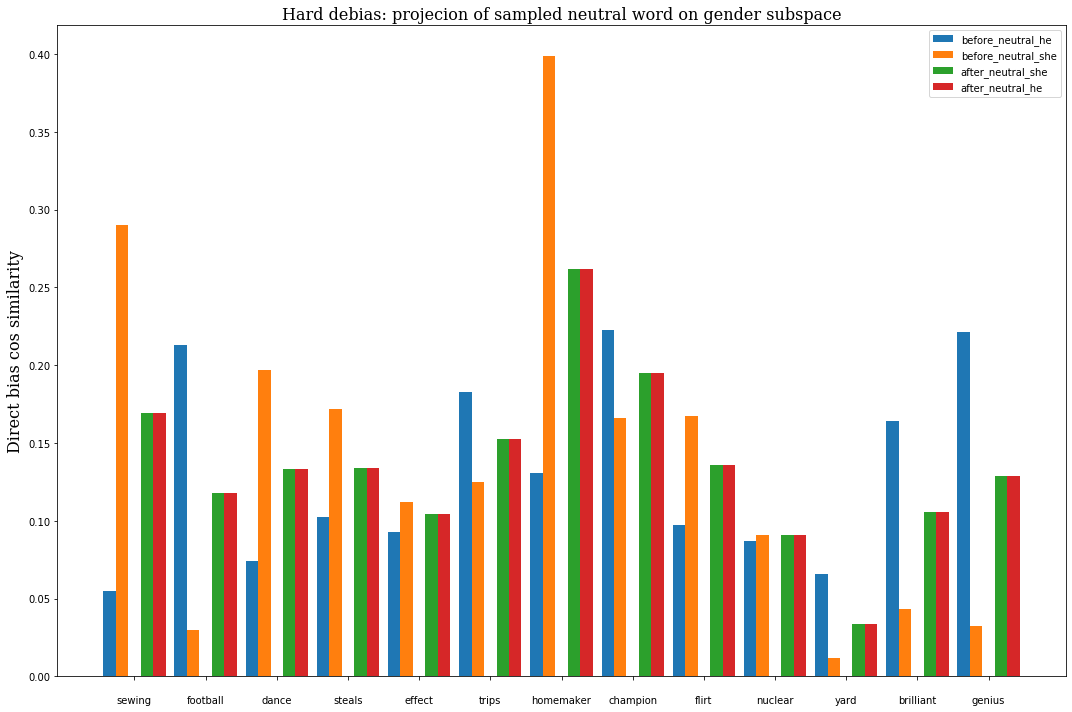

In [37]:
ahe
ashe
bhe
bshe

x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width, ahe, width/2, label='before_neutral_he')
rects2 = ax.bar(x - width/2, ashe, width/2, label='before_neutral_she')
rects3 = ax.bar(x + width/2, bhe, width/2, label='after_neutral_she')
rects4 = ax.bar(x + width, bshe, width/2, label='after_neutral_he')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Direct bias cos similarity',font)
ax.set_title('Hard debias: projecion of sampled neutral word on gender subspace',font)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(neutral_word)
ax.legend()

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

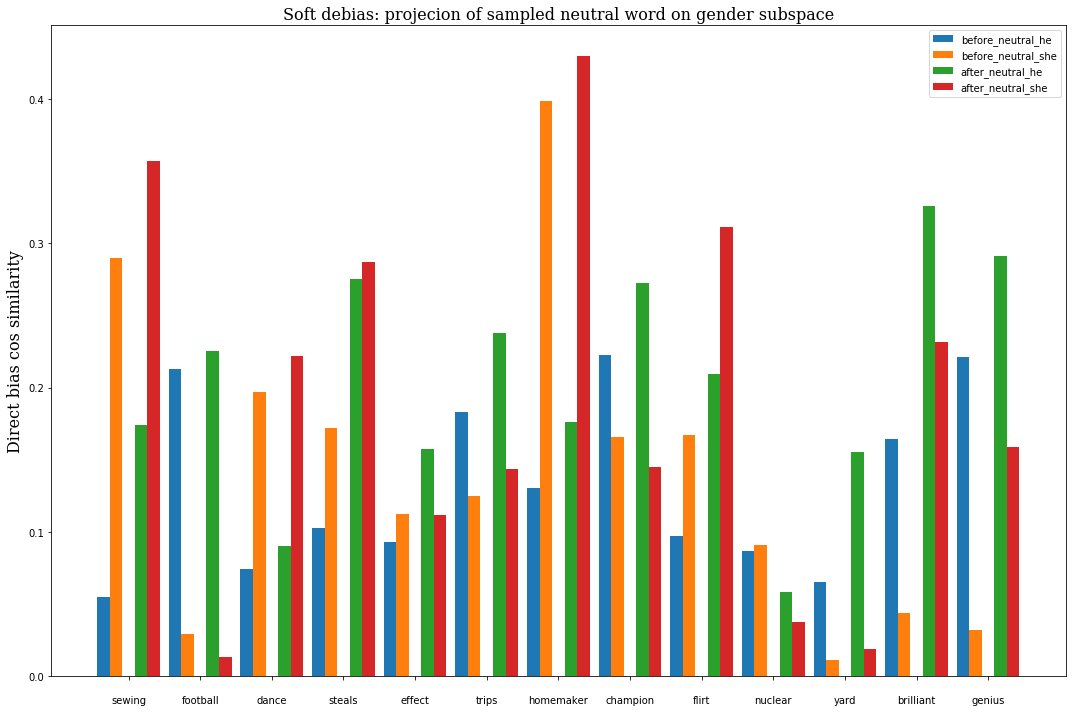

In [41]:
weight=np.load('/home/senhan/Documents/condapython/weight_8_goof_perform.npy')
ahe,ashe,sohe,soshe=fourbars_soft_debias_eval(neutral_word,w['he'],w['she'],weight)

x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width, ahe, width/2, label='before_neutral_he')
rects2 = ax.bar(x - width/2, ashe, width/2, label='before_neutral_she')
rects3 = ax.bar(x + width/2, sohe, width/2, label='after_neutral_he')
rects4 = ax.bar(x + width, soshe, width/2, label='after_neutral_she')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Direct bias cos similarity',font)
ax.set_title('Soft debias: projecion of sampled neutral word on gender subspace',font)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(neutral_word)
ax.legend()

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

In [507]:
sohe

[0.17421177,
 0.22506583,
 0.08990904,
 0.27504507,
 0.15748581,
 0.23806052,
 0.17609613,
 0.27259803,
 0.20911425,
 0.05819067,
 0.15512039,
 0.32590517,
 0.29121175]

In [279]:
def hard_debias_eval(neutralwords,eword1,eword2):
    beforedist=[]
    afterdist=[]
    for testword in neutralwords:
        testword=unit(w[testword])
        e1=unit(eword1)
        e2=unit(eword2)
#harddebias
        hretestword=neural_re_embedding(testword,subspace)#neutralize
        hr1,hr2=equalize(e1,e2,subspace)

        hdist=distance(testword,e1,e2)
        hrdist=distance(hretestword,hr1,hr2)
        beforedist.append(np.abs(hdist[0]-hdist[1]))
        afterdist.append(np.abs(hrdist[0]-hrdist[1]))
    return beforedist,afterdist


def soft_debias_eval(neutralwords,eword1,eword2,weight):
    beforedist=[]
    afterdist=[]
    for testword in neutralwords:
        testword=unit(w[testword])
        e1=unit(eword1)
        e2=unit(eword2)
#harddebias
        sretestword=unit(np.dot(testword,weight))
        sr1=unit(np.dot(e1,weight))
        sr2=unit(np.dot(e2,weight))

        sdist=distance(testword,e1,e2)
        srdist=distance(sretestword,sr1,sr2)
        beforedist.append(np.abs(sdist[0]-sdist[1]))
        afterdist.append(np.abs(srdist[0]-srdist[1]))
    return beforedist,afterdist


In [624]:
a,b=hard_debias_eval(neutral_word,w['man'],w['woman'])

In [281]:
a

[0.106086135,
 0.116081476,
 0.0612123,
 0.0035272837,
 0.04250431,
 0.008230686,
 0.159778,
 0.030205965,
 0.04599178,
 0.019836307,
 0.059933305,
 0.088428855,
 0.14135206]

In [282]:
b

[0.0,
 1.1920929e-07,
 1.1920929e-07,
 0.0,
 1.1920929e-07,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1920929e-07,
 0.0,
 0.0]

In [286]:
data=np.load('/home/senhan/Documents/condapython/weight_8_goof_perform.npy')
c,d=soft_debias_eval(neutral_word,w['man'],w['woman'],data)

In [626]:
c

[0.106086135,
 0.116081476,
 0.0612123,
 0.0035272837,
 0.04250431,
 0.008230686,
 0.159778,
 0.030205965,
 0.04599178,
 0.019836307,
 0.059933305,
 0.088428855,
 0.14135206]

In [627]:
d

[0.07056022,
 0.13838315,
 0.054746866,
 0.01819408,
 0.036788344,
 0.03677857,
 0.116248965,
 0.057704568,
 0.04732585,
 0.021049976,
 0.095327854,
 0.09810233,
 0.13787568]

In [36]:
x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars



font={
    'family': 'serif',
    #'color':  'blue',
    'weight': 'normal',
    'size': 16,
}

plt.figure(figsize=(15,10))
plt.plot(x, a,'og',label='Before harddebias',markersize=10)
plt.plot(x, b,'+r',label='After harddebias',markersize=10)
plt.tick_params(pad=5)
plt.title("Distance changes before and after harddebias",fontdict=font)
#plt.xlabel('Neutralword',fontdict=font)
plt.ylabel("Dist[neutral word to 'man'] - Dist[neutral word to 'woman']",fontdict=font)
plt.tick_params(axis='x', which='major', pad=15)
plt.xticks(x,neutral_word)
plt.legend()
#set_xticklabels(neutral_word)

plt.show()

NameError: name 'a' is not defined

<Figure size 1080x720 with 0 Axes>

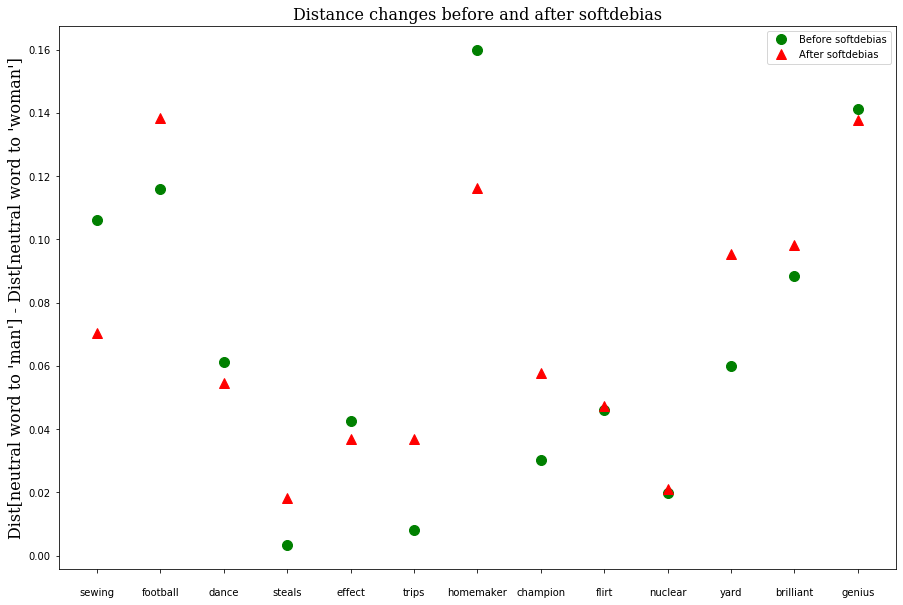

In [634]:
x = np.arange(len(neutral_word))  # the label locations
width = 0.35  # the width of the bars



font={
    'family': 'serif',
    #'color':  'blue',
    'weight': 'normal',
    'size': 16,
}

plt.figure(figsize=(15,10))
plt.plot(x, c,'og',label='Before softdebias',markersize=10)
plt.plot(x, d,'^r',label='After softdebias',markersize=10)
plt.tick_params(pad=5)
plt.title("Distance changes before and after softdebias",fontdict=font)
#plt.xlabel('Neutralword',fontdict=font)
plt.ylabel("Dist[neutral word to 'man'] - Dist[neutral word to 'woman']",fontdict=font)
plt.tick_params(axis='x', which='major', pad=15)
plt.xticks(x,neutral_word)
plt.legend()
#set_xticklabels(neutral_word)

plt.show()


In [387]:
neutral_word

array([ 0.0449282 , -0.04277595, -0.12267821,  0.06241523,  0.05057786,
        0.09631315,  0.02609602, -0.06322232, -0.06026298,  0.0133843 ,
        0.09200865,  0.00763376, -0.00716295, -0.0242128 , -0.04546626,
        0.0742526 ,  0.03524308,  0.07640485,  0.01062673, -0.05299914,
       -0.12214014, -0.0613391 ,  0.01963927, -0.01883218,  0.02354022,
       -0.02044637, -0.06806488,  0.01298075, -0.03349438, -0.08770415,
        0.0371263 , -0.06887197, -0.01331704,  0.02824827,  0.04196886,
        0.01257721,  0.04519723,  0.04734948,  0.01802509, -0.00374962,
       -0.00235402,  0.02058088,  0.05730363, -0.05246107, -0.05730363,
       -0.02380926, -0.04788755,  0.14204845,  0.03228374,  0.07479066,
        0.01567107,  0.02179152,  0.09631315,  0.02004282, -0.06241523,
       -0.01910121, -0.01022318, -0.01990831,  0.00689392, -0.04654239,
        0.02232959, -0.00161419, -0.03295632,  0.03820242,  0.10815052,
        0.05622751, -0.00591869,  0.11084083,  0.06618166, -0.01

In [46]:
tsne_results

array([[-263.7309  , -204.16566 ],
       [ -28.02779 ,  610.8743  ],
       [ 810.9236  ,   39.856396]], dtype=float32)

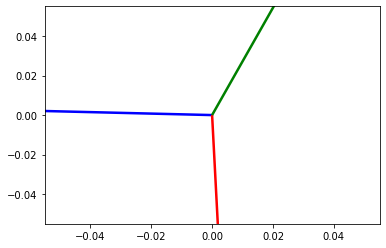

In [51]:
origin=[0],[0]
plt.quiver(*origin,tsne_results[:,0],tsne_results[:,1],color=['b','r','g'],scale=100)
plt.show()

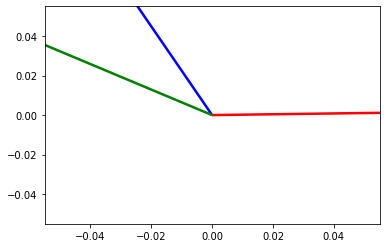

In [35]:
plt.quiver(*origin,tsne_results[:,0],tsne_results[:,1],color=['b','r','g'],scale=0.000001)
plt.show()

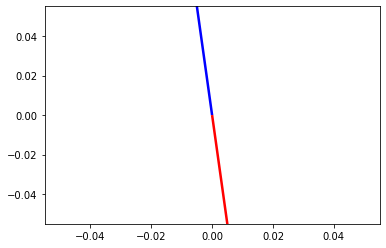

In [39]:
plt.quiver(*origin,tsne_results[:,0],tsne_results[:,1],color=['b','r'],scale=0.000001)
plt.show()

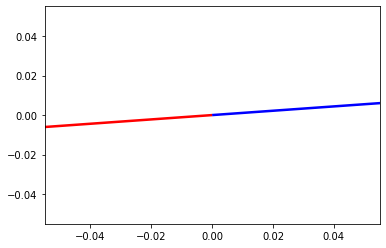

In [42]:
plt.quiver(*origin,tsne_results[:,0],tsne_results[:,1],color=['b','r','g'],scale=100)
plt.show()

In [53]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(matrix)
pca_result

array([[-0.42088506,  0.03665477],
       [-0.4964748 , -0.03469505],
       [ 0.91735977, -0.00195972]], dtype=float32)

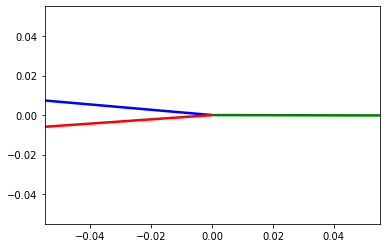

In [57]:
origin=[0],[0]
plt.quiver(*origin,pca_result[:,0],pca_result[:,1],color=['b','r','g'],scale=0.1)
plt.show()

In [59]:
direct_cos_bias(neural_word,subspace)

0.10380465

In [60]:
direct_cos_bias(rembed_word,subspace)

1.8626451e-09

In [63]:
np.transpose(pca_result)[1]

array([ 0.03665477, -0.03469505, -0.00195972], dtype=float32)